# Part I - Ford GoBike System Data Exploration
## by Winner Abiodun

## Introduction
> Ford GoBike System Dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Assessing the Data
This would be done both visually but mostly programatically

In [2]:
# load in the dataset into a pandas dataframe, print properties
ford= pd.read_csv("201902-fordgobike-tripdata.csv")
print(ford.shape)
ford.head(10)

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
# Summary statistics for every column in the dataframe 
ford.describe(include="all")

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
count,183412.000000,183412,183412,183215.000000,183215,183412.000000,183412.000000,183215.000000,183215,183412.000000,183412.000000,183412.000000,183412,175147.000000,175147,183412
unique,NaN,183401,183397,NaN,329,NaN,NaN,NaN,329,NaN,NaN,NaN,2,NaN,3,2
top,NaN,2019-02-07 17:56:08.8970,2019-02-11 18:53:55.0820,NaN,Market St at 10th St,NaN,NaN,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,Subscriber,NaN,Male,No
freq,NaN,2,2,NaN,3904,NaN,NaN,NaN,4857,NaN,NaN,NaN,163544,NaN,130651,166053
mean,726.078435,NaN,NaN,138.590427,NaN,37.771223,-122.352664,136.249123,NaN,37.771427,-122.352250,4472.906375,NaN,1984.806437,NaN,NaN
std,1794.389780,NaN,NaN,111.778864,NaN,0.099581,0.117097,111.515131,NaN,0.099490,0.116673,1664.383394,NaN,10.116689,NaN,NaN
min,61.000000,NaN,NaN,3.000000,NaN,37.317298,-122.453704,3.000000,NaN,37.317298,-122.453704,11.000000,NaN,1878.000000,NaN,NaN
25%,325.000000,NaN,NaN,47.000000,NaN,37.770083,-122.412408,44.000000,NaN,37.770407,-122.411726,3777.000000,NaN,1980.000000,NaN,NaN
50%,514.000000,NaN,NaN,104.000000,NaN,37.780760,-122.398285,100.000000,NaN,37.781010,-122.398279,4958.000000,NaN,1987.000000,NaN,NaN
75%,796.000000,NaN,NaN,239.000000,NaN,37.797280,-122.286533,235.000000,NaN,37.797320,-122.288045,5502.000000,NaN,1992.000000,NaN,NaN


In [4]:
# Check the dataframe info
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
# Check the number of null values
ford.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
#Check for duplicates
ford.duplicated().sum()

0

There appear to be no duplicates in the dataframe

Issues to be resolved
---
>-- Missing Values in the [start_station_id, start_station_name, end_station_id,end_station_name, member_birth_year and member_gender]

>-- incorrect data types in the [start_time,end_time, start_station_id,end_station_id, user_type,member_gender,member_birth_year, bike_share_for_all_trip]

>-- Duration in seconds

>-- Irrelevant columns [start_station_id, end_station_id, bike_id   ]

## Issue 1: Missing Values
 Resolve Missing Values in the [start_station_id, start_station_name, end_station_id,end_station_name, member_birth_year and member_gender]

First lets check to see whether the same null values cut accross 2 or more columns

In [7]:
# Check the rows that do not have null values in the start_station_id_column
(ford[ford.start_station_id.notna()]).isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

This shows that the same null values cut across the station id and station name for both the start and end station

In [8]:
# Subset the dataframe
ford = ford[ford.start_station_id.notna()]

Secondly lets check to see whether the same null values cut applies to both the member_year and gender

In [9]:
# Check the rows that do not have null values in the member_gender column
(ford[ford.member_gender.notna()]).isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

This suggests that the member gender null values coincide with the member birth year values

In [10]:
# Subset the dataframe
ford = ford[ford.member_gender.notna()]

In [11]:
#Check the notnull values
ford.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


The result shows that the data frame now has 174952 not null row values as opposed to the 183412 rows

## Issue 2: Incorrect Data Types
Change data types in the [start_time,end_time, start_station_id,end_station_id, user_type,member_gender,member_birth_year, bike_share_for_all_trip]

In [12]:
# Check through the extant dtypes
ford.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [13]:
def convert(df):
    """
    This function transforms column datatyes 
    based on given conditions and returns the dataframe
    """
    # Loop through the column names
    for column in df.columns:
        # First condition to change column from object to datetime type
        if "time" in column:
            df[column] = pd.to_datetime(df[column])
        # Change id columns from float to category type
        elif "id" in column:
            df[column] = df[column].astype(int)
            df[column]=df[column].astype("category")
        # change year column from float to int
        elif "year" in column:
            df[column]=df[column].astype(int)
        # Change column from object to category
        elif "gender" in column:
            df[column] = df[column].astype("category")
        # Change data type to category
        elif "trip" in column:
            df[column] = df[column].astype("category")
        # Change user type from object to category
        elif "user" in column:
            df[column] = df[column].astype("category")
        else:
            df[column]=df[column]
    return df

In [14]:
# Convert Data frame data types
ford=convert(ford)

In [15]:
# Verify changes
ford.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null category
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null category
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null category
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
dtypes: category(6), datetime64[ns](2), float64(4), int64(2

The dataframe now has 6 category columns, 4 float columns and 2 columns each for both int type and object data types

## Issue 3: Irrelevant columns
Drop columns Irrelevant to our analysis [start_station_id, end_station_id, bike_id   ]

In [16]:
#Subset the dataFrame to only columns relevant to the analysis
cols = [
    "start_station_id", 
    "end_station_id",
    "bike_id"
]

ford.drop(columns=cols,inplace=True)

# Verify changes
print(ford.shape)
ford.head()

The data set now has 174952 rows and 13 columns relevant to my analysis

### What is the structure of your dataset?

> The Dataset is quite large, it initially had 183412 rows of trip observations and 16 columns or features that describes each trip.

> Feature description:

>-- duration_sec: This describes the total seconds the trip took

>-- start_time: This is the date and time the trip started

>-- end_time: This is the date and time the trip ended

>-- start_station_id: This is the id of the trip generating station

>-- start_station_name: This is the name of the trip generating station

>-- start_station_latitude: This is the latitude of the trip generating station

>-- start_station_longitude	: This is the longitude of the trip generating station

>-- end_station_id: This is the id of the destination station

>-- end_station_name: This is the name of the destination station

>-- end_station_latitude: This is the Latitude of the destination station

>-- end_station_longitude: This is the Longitude of the generating station

>-- bike_id: This is the unique id of the bike used for the trips

>-- user_type: This is the type of user either a customer/casual rider or a subscriber

>-- member_birth_year: This is the year the member was born

>-- member_gender: This describes the gender of the member in terms of male, female and other

>-- bike_share_for_all_trip: This ascertains whether the user used this bike sharing for all trips


> The data types were mostly numeric with float(7), integers(2), objects(7)

> After wrangling The data set now has 174952 rows and 13 columns (duration, start_time, end_time,  user_type, member_birth_year, member_gender, bike_share_for_all_trip, start_station_name, start_station_latitude, start_station_longitude,  end_station_name, end_station_latitude, end_station_longitude ) relevant to my analysis with 6 category columns, 4 float columns and 2 columns each for both int type and object data types and date time types

### What is/are the main feature(s) of interest in your dataset?

> I'm particularly interested in the impact all the columns have on the trip duration since trip duration reduction is the overall purpose of transport innnovation

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> i think the start time particularly and by extention the end time columns will have the most influence on trip duration, as a transport manager, peak periods are undisputably major determinants of transport duration. I also think the user_type and gender will have significant impacts on the duration but not as much as the start time 

## Univariate Exploration


Columns to be explored
---
**1. duration_sec**

**2. start_time and end_time**  

**3. Bike Station Exploration**

**4. User Type Distribution**

**5. Member Gender Distribution**

**6. BIke usership for all round trips Distribution**

**7. Start and end Longitude and Latitude Exploration**

**8. Member Year Distribution**


In [17]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
dtypes: category(3), datetime64[ns](2), float64(4), int64(2), object(2)
memory usage: 15.2+ MB


**1. Bike Trip Duration Exploration**

How is the Trip duration distributed?

In [18]:
# Check the descriptive statistics of the data
ford.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

We can clearly observe that the standard deviation of this column is much larger than the mean. This implies a widely spread or skewed distribution

75% of the data is between 510 seconds and 789 seconds 

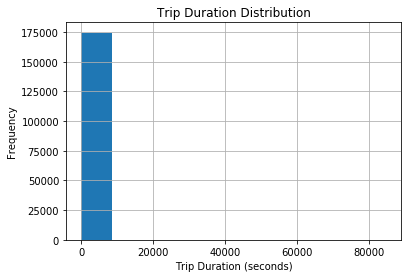

In [19]:
# plot the data in the column
ford.duration_sec.hist()
# Set Axis Label
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Frequency")
plt.title("Trip Duration Distribution")
plt.show()

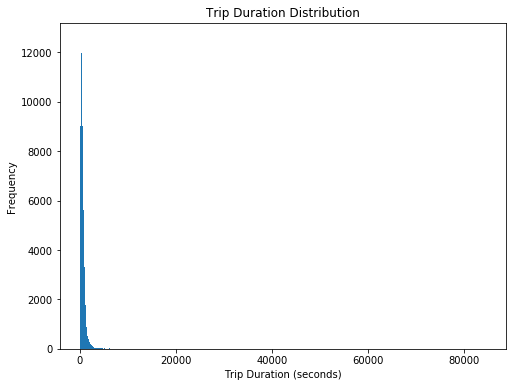

In [20]:
# Plot the distribution with a more viable bin size
plt.figure(figsize=[8,6])
plt.hist(data=ford, x="duration_sec", bins=np.arange(ford.duration_sec.min(), ford.duration_sec.max()+50, 50))
# Set axis limit to see the data concentration centres
# plt.xlim(0,2000)
# Set axis labels
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Frequency")
plt.title("Trip Duration Distribution")

plt.show()

The distribution is obviously skewed and appears to be bimodal, lets zoom in the identify the two closely packed modal points

It appears that alot of values are concentrated between 0seconds and about 2000seconds

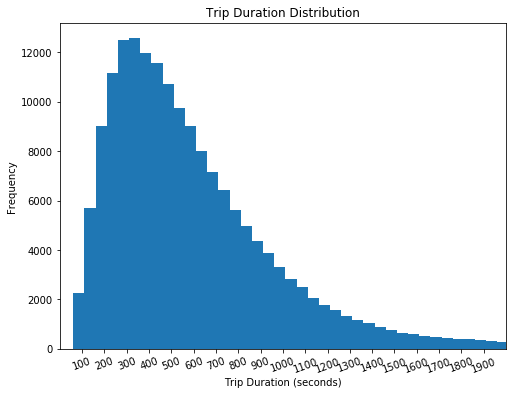

In [21]:
# Plot the distribution
plt.figure(figsize=[8,6])
bins=np.arange(ford.duration_sec.min(), ford.duration_sec.max()+50, 50)
plt.hist(data=ford, x="duration_sec", bins=bins)
# Set  axis limit
plt.xlim(0,2000)
# Reset the tick points to show the peaks
plt.xticks(np.arange(100,2000,100), rotation=20)
# Set axis labels
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Frequency")
plt.title("Trip Duration Distribution")
plt.show()

There appear to be one mode at 200 and 300seconds and another mode between 300 and 400seconds.

lets perfrom a log transformatio to see the distribution

In [22]:
# Decribe the log form of the column
ford["log_duration"] = np.log(ford.duration_sec)
ford.log_duration.describe()

count    174952.000000
mean          6.234995
std           0.702727
min           4.110874
25%           5.777652
50%           6.234411
75%           6.670766
max          11.345075
Name: log_duration, dtype: float64

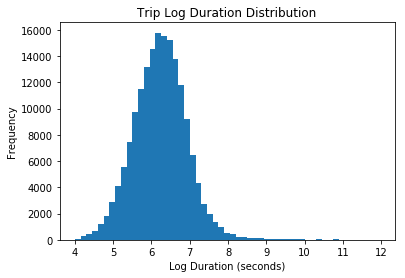

In [23]:
#Plot the log distribution
ford.log_duration.plot.hist(bins=np.arange(4,12,0.15))
# Set axis labels
plt.xlabel("Log Duration (seconds)")
plt.ylabel("Frequency")
plt.title("Trip Log Duration Distribution");

This ascertains the skewed nature of the distribution with most values concentrated between points 5 and 7

In [24]:
# Lets create a new Duration Column measured in Trip minutes
ford["duration_min"]=round((ford["duration_sec"]/60), 2)

In [25]:
ford.duration_min.describe()

count    174952.000000
mean         11.733373
std          27.370085
min           1.020000
25%           5.380000
50%           8.500000
75%          13.150000
max        1409.130000
Name: duration_min, dtype: float64

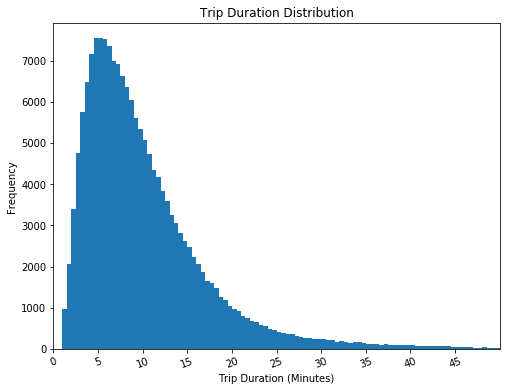

In [26]:
# Plot the distribution of duration minutes to cross validate our findings
plt.figure(figsize=[8,6])
bins=np.arange(ford.duration_min.min(), ford.duration_min.max()+0.5, 0.5)
plt.hist(data=ford, x="duration_min", bins=bins)
plt.xlim(0,50)
plt.xticks(np.arange(0,50,5), rotation=20)
# Set axis labels
plt.xlabel("Trip Duration (Minutes)")
plt.ylabel("Frequency")
plt.title("Trip Duration Distribution")

plt.show()

The data is equally skewed. However plotting the duration in minutes naturally aligns with the observations made when the duration measured in seconds is plotted with a transformed axis

In [27]:
# Lets create a new Duration Column measured in Trip Hours
ford["duration_hrs"]=round((ford["duration_sec"]/3600), 2)

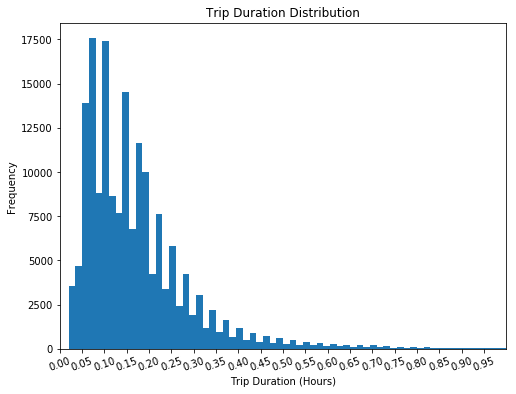

In [28]:
# PLot the duration in hours
plt.figure(figsize=[8,6])
bins=np.arange(ford.duration_hrs.min(), ford.duration_hrs.max()+0.015, 0.015)
plt.hist(data=ford, x="duration_hrs", bins=bins)
plt.xlim(0,1)
# plt.ylim(0,15000)
plt.xticks(np.arange(0,1,0.05), rotation=20)
# Set axis labels
plt.xlabel("Trip Duration (Hours)")
plt.ylabel("Frequency")
plt.title("Trip Duration Distribution")

plt.show()

This ascertains the slightly bimodal nature of this skewed data.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

**2. Trip start_time and end time exploration**

what is the most common Trip start time and end time? in terms of the days of the Week, Month and time of day

In [29]:
# Take a sample of the start time
ford.start_time.sample(10)

11070    2019-02-27 19:07:45.789
122916   2019-02-11 10:15:59.316
74375    2019-02-19 10:37:03.375
82074    2019-02-18 11:11:10.468
56364    2019-02-21 09:06:44.007
112629   2019-02-12 14:46:09.361
151128   2019-02-06 17:34:00.553
94996    2019-02-15 15:17:12.725
149055   2019-02-06 20:08:49.936
45402    2019-02-22 12:23:06.938
Name: start_time, dtype: datetime64[ns]

In [30]:
# Take a sample of the end time
ford.end_time.sample(10)

78630    2019-02-18 19:09:16.026
157680   2019-02-05 21:07:11.117
84426    2019-02-17 17:51:57.039
101968   2019-02-14 17:12:30.369
54533    2019-02-21 12:44:32.241
67631    2019-02-20 07:50:48.353
114443   2019-02-12 09:41:40.981
37816    2019-02-23 13:27:24.573
87281    2019-02-17 10:03:48.952
175910   2019-02-02 13:10:45.541
Name: end_time, dtype: datetime64[ns]

It apears that the start and end time is only for the month of february in the year 2019

This limits our analysis to only week days and time of the day

In [31]:
# Extract the week days and assign it to a new column in the dataframe
ford["start_week_days"]= ford['start_time'].dt.day_name().astype("category")
ford["end_week_days"]= ford['end_time'].dt.day_name().astype("category")

In [32]:
# Order the start week days
ford.groupby("start_week_days")["duration_sec"].count().sort_values()

start_week_days
Saturday     14414
Sunday       14512
Monday       25641
Friday       27663
Wednesday    28426
Tuesday      30584
Thursday     33712
Name: duration_sec, dtype: int64

In [33]:
# Order the end week days
ford.groupby("end_week_days")["duration_sec"].count().sort_values()

end_week_days
Saturday     14422
Sunday       14519
Monday       25641
Friday       27655
Wednesday    28417
Tuesday      30591
Thursday     33707
Name: duration_sec, dtype: int64

The counts reveal very slight changes between the start time and end time.

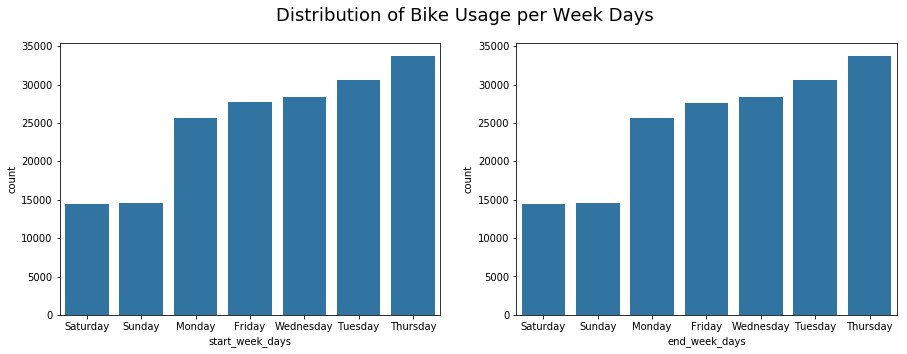

In [34]:
# Set axis area
plt.figure(figsize=[15,5])
# set title
plt.suptitle("Distribution of Bike Usage per Week Days", fontsize=18)

# Set colour
color=sb.color_palette()[0]

# Plot 1 showing normal pie chart
plt.subplot(1,2,1)
order_s=ford.groupby("start_week_days")["duration_sec"].count().sort_values().index
sb.countplot(data=ford, x="start_week_days", color=color, order=order_s)

# Plot 2 showing Exploded portion of pie chart
plt.subplot(1,2,2)
order_e=ford.groupby("end_week_days")["duration_sec"].count().sort_values().index
sb.countplot(data= ford, x="end_week_days", color=color, order=order_e)


plt.show()

The dataset shows us that the most common start day of the week is Thursday, this also applies to the the day the trip terminates.

In [35]:
# Extract the day hours and assign them to new columns in the dataframe
ford["start_hour"]= ford.start_time.dt.hour.astype("category")
ford["end_hour"]= ford.end_time.dt.hour.astype("category")

In [36]:
# Order the start week days
ford.groupby("start_hour")["duration_sec"].count().sort_values()

start_hour
3       164
4       227
2       355
1       525
5       866
0       893
23     1572
22     2793
6      3293
21     4400
20     6211
11     7461
14     7677
10     7970
13     8098
12     8220
15     8646
19     9424
7     10231
16    13473
9     15204
18    16118
8     20227
17    20904
Name: duration_sec, dtype: int64

In [37]:
# Extract the week days and assign it to a new column in the dataframe
ford.groupby("end_hour")["duration_sec"].count().sort_values()

end_hour
3       168
4       225
2       405
1       541
5       738
0       965
23     1747
6      2802
22     3099
21     4701
20     6622
11     7212
14     7696
13     8086
12     8139
15     8292
7      8448
10     8538
19    10227
16    12526
9     16973
18    17468
8     19012
17    20322
Name: duration_sec, dtype: int64

The slight changes also applies to the start and end hours

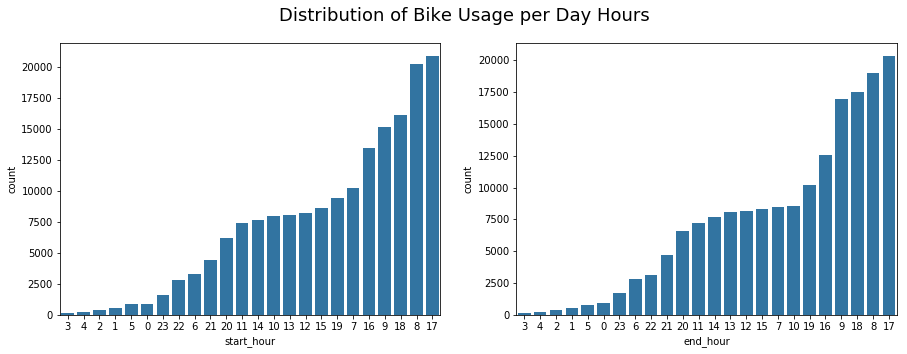

In [38]:
# Set axis area
plt.figure(figsize=[15,5])
# set title
plt.suptitle("Distribution of Bike Usage per Day Hours", fontsize=18)

# Set colour
color=sb.color_palette()[0]

# Plot 1 showing normal pie chart
plt.subplot(1,2,1)
order_s=ford.groupby("start_hour")["duration_sec"].count().sort_values().index
sb.countplot(data=ford, x="start_hour", color=color, order=order_s)

# Plot 2 showing Exploded portion of pie chart
plt.subplot(1,2,2)
order_e=ford.groupby("end_hour")["duration_sec"].count().sort_values().index
sb.countplot(data= ford, x="end_hour", color=color, order=order_e)


plt.show()

The most common Trip start and end times are the 17th,8th,18th,9th,16th hour which translates to 5pm,8am,6pm,9am,4pm,

**3. Bike Station Exploration**

What are the busiest stations in the dataset?

In [39]:
# Check the count for the top 10 values
ford.start_station_name.value_counts().head(10)

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2577
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
Name: start_station_name, dtype: int64

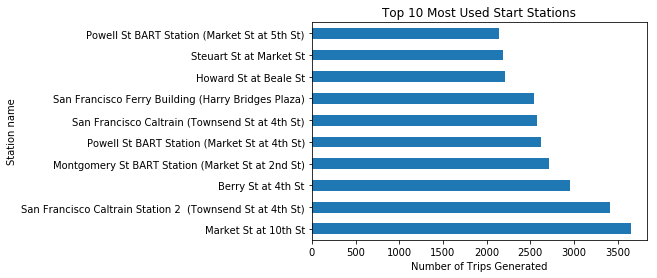

In [40]:
# Set colour
color=sb.color_palette()[0]
ford.start_station_name.value_counts().head(10).plot.barh(color=color)
plt.ylabel("Station name")
plt.xlabel("Number of Trips Generated")
plt.title("Top 10 Most Used Start Stations")
plt.show()

This shows that the station at 10th street is the major trip generator and generates over 3500 trips in a month

In [41]:
ford.end_station_name.value_counts().head(10)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Powell St BART Station (Market St at 4th St)                 2854
Berry St at 4th St                                           2782
The Embarcadero at Sansome St                                2341
Steuart St at Market St                                      2264
Powell St BART Station (Market St at 5th St)                 2153
Name: end_station_name, dtype: int64

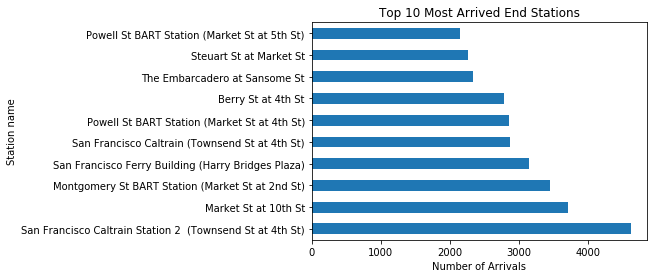

In [42]:
# Set colour
color=sb.color_palette()[0]
ford.end_station_name.value_counts().head(10).plot.barh(color=color)
plt.ylabel("Station name")
plt.xlabel("Number of Arrivals")
plt.title("Top 10 Most Arrived End Stations")
plt.show()

In [43]:
ford.start_station_name.value_counts().tail(10)

Backesto Park (Jackson St at 13th St)    17
23rd Ave at Foothill Blvd                17
Leavenworth St at Broadway               16
Taylor St at 9th St                      13
Farnam St at Fruitvale Ave                9
Willow St at Vine St                      9
Parker Ave at McAllister St               7
21st Ave at International Blvd            4
Palm St at Willow St                      3
16th St Depot                             2
Name: start_station_name, dtype: int64

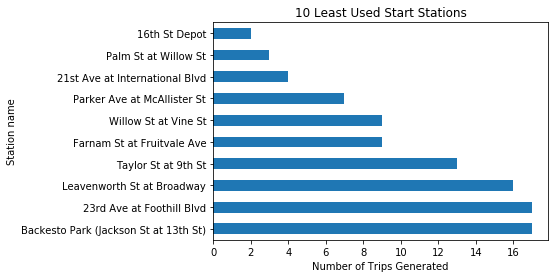

In [44]:
# Set colour
color=sb.color_palette()[0]
ford.start_station_name.value_counts().tail(10).plot.barh(color=color)
plt.ylabel("Station name")
plt.xlabel("Number of Trips Generated")
plt.title("10 Least Used Start Stations")
plt.show()

The Depot is the least busiest trip station with only 2 trips generated this month

In [45]:
ford.end_station_name.value_counts().tail(10)

Backesto Park (Jackson St at 13th St)    18
Foothill Blvd at Harrington Ave          16
Leavenworth St at Broadway               12
Taylor St at 9th St                      11
Farnam St at Fruitvale Ave               10
Parker Ave at McAllister St               9
Palm St at Willow St                      7
16th St Depot                             6
21st Ave at International Blvd            5
Willow St at Vine St                      5
Name: end_station_name, dtype: int64

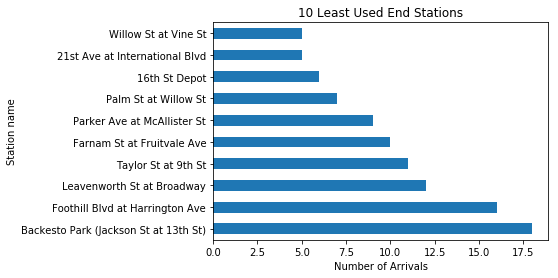

In [46]:
# Set colour
color=sb.color_palette()[0]
ford.end_station_name.value_counts().tail(10).plot.barh(color=color)
plt.ylabel("Station name")
plt.xlabel("Number of Arrivals")
plt.title("10 Least Used End Stations")
plt.show()

This shows a general trend that the end station generally has more traffic than the start stations

This is because the sme start station also serves as the end station for some trips

**4. User Type Distribution**

How is the user type distributed?

In [47]:
# Check the value counts of the unique values in the column
type_counts = ford.user_type.value_counts()
type_counts

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

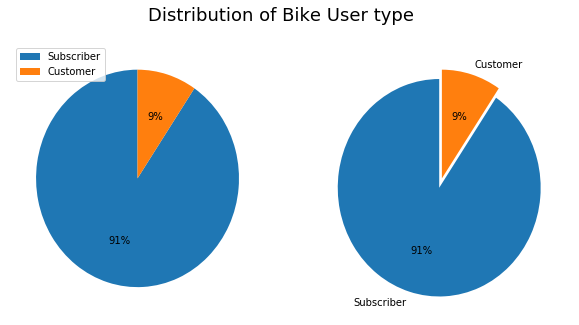

In [48]:
# Set axis area
plt.figure(figsize=[10,5])
# set title
plt.suptitle("Distribution of Bike User type", fontsize=18)

# Plot 1 showing normal pie chart
plt.subplot(1,2,1)
plt.pie(type_counts, startangle=90, autopct="%.0f%%")
plt.legend(["Subscriber", "Customer"])

# Plot 2 showing Exploded portion of pie chart
plt.subplot(1,2,2)
explode=[0.09,0]
plt.pie(type_counts, labels=type_counts.index, startangle=90, autopct="%.0f%%", explode=explode  )


plt.show()

The distribution shows that over 90% of Bike users are subscribers and less than 10% of Bike users are Customers

**5. Member Gender Distribution**

How is the Gender distributed?

In [49]:
# Check the value counts of the unique values in the column
gender_counts= ford.member_gender.value_counts()
gender_counts

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

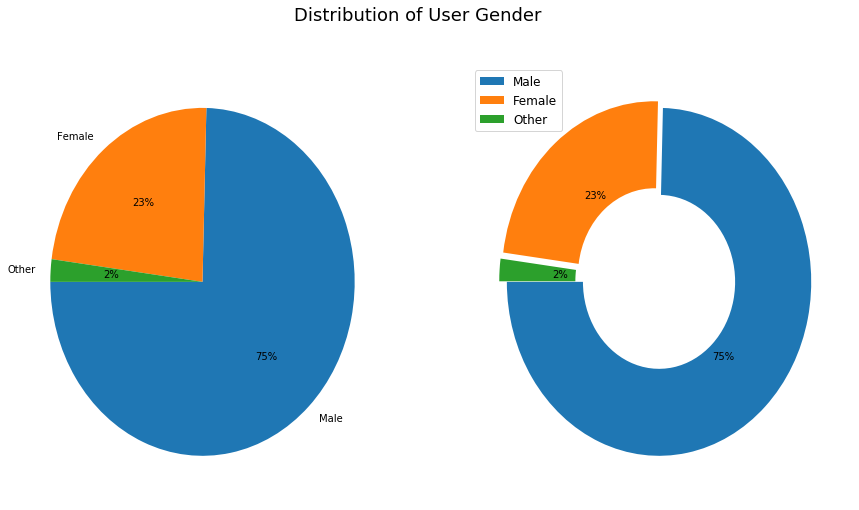

In [50]:
# Set axis area
plt.figure(figsize=[15,8])
# set title
plt.suptitle("Distribution of User Gender", fontsize=18)

# Plot 1 showing normal pie chart
plt.subplot(1,2,1)
plt.pie(gender_counts, labels=gender_counts.index, startangle=180, autopct="%.0f%%")

# Plot 2 showing Exploded portion of  Donut pie chart
plt.subplot(1,2,2)
explode=[0,0.05,0.05]
plt.pie(gender_counts, startangle=180, autopct="%.0f%%", wedgeprops={"width":0.5}, explode=explode)
plt.legend(["Male", "Female", "Other"],loc="upper left",fontsize=12)


plt.show()

The distribution shows that 75% of users are male, 23% are Female and about 2% are gender type other

**6. BIke usership for all round trips Distribution**

How is the Bike usership for round trips distributed?

In [51]:
# Check the value counts of the unique values in the column
trip_counts= ford.bike_share_for_all_trip.value_counts()
trip_counts

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

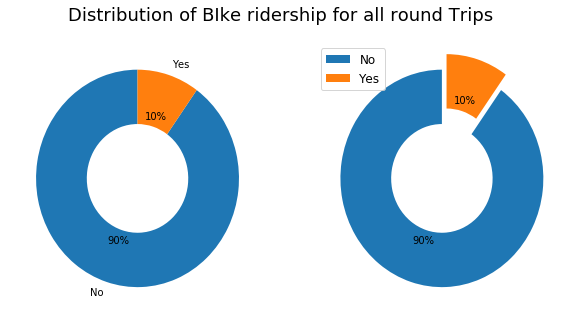

In [52]:
# Set axis area
plt.figure(figsize=[10,5])
# set title
plt.suptitle("Distribution of BIke ridership for all round Trips", fontsize=18)

# Plot 1 showing normal Donut pie chart
plt.subplot(1,2,1)
plt.pie(trip_counts, labels=trip_counts.index, startangle=90, autopct="%.0f%%", wedgeprops={"width":0.5})

# Plot 2 showing Exploded portion of  Donut pie chart
plt.subplot(1,2,2)
explode=[0,0.15]
plt.pie(trip_counts,startangle=90, autopct="%.0f%%", wedgeprops={"width":0.5}, explode=explode)
plt.legend(["No","Yes"],loc="upper left",fontsize=12)


plt.show()

The Distribution shows that only about 10% of users use Bikes for all round trips, about 90% do not!

**7. Start and end Longitude and Latitude Exploration**

How is the distance distributed amongst the bikes?

In [53]:
from math import sin, cos, sqrt, atan2, radians
def distance (df, start_lat, start_lon, end_lat, end_lon):
    """
    This is a function that derives 
    the distance (km) from the given coordinates
    Parameters
    ----------
    start_lat : float
        (lat)
    start_lon : float
       (lon)
    end_lat : float
        (lat)
    end_lat : float
        (lon)

    Returns
    -------
    distance_in_km : float
    """
    # Radius of the Earth
    R = 6373.0
    
    # Convert to radians because in python trig functions use rad not deg
    start_lat= np.radians(df[start_lat]) 
    start_lon= np.radians(df[start_lon])
    end_lat= np.radians(df[end_lat])
    end_lon= np.radians(df[end_lon])
    
    # Calculate the difference between the start and end longitude and latitude
    lon_diff = end_lon - start_lon
    lat_diff = end_lat - start_lat
    
    a = np.sin(lat_diff / 2)**2 + np.cos(start_lat) * np.cos(end_lat) * np.sin(lon_diff / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    # Find the distance
    distance = R * c
    
    return distance


In [54]:
# Extract distanc based on longitude and latitude
ford["distance"] = distance(ford, "start_station_latitude", "start_station_longitude",
"end_station_latitude", "end_station_longitude")

In [55]:
# Check the summary statistics of the new column
ford.distance.describe()

count    174952.000000
mean          1.690580
std           1.097301
min           0.000000
25%           0.910729
50%           1.430278
75%           2.224708
max          69.491049
Name: distance, dtype: float64

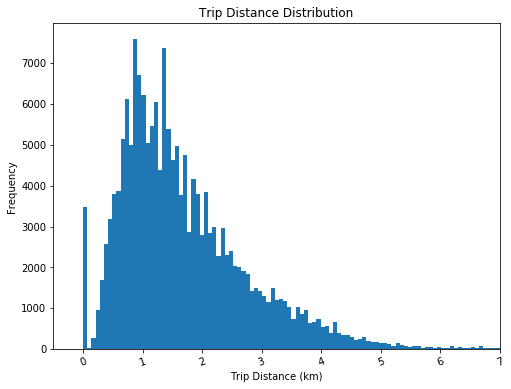

In [56]:
# Plot the distribution of distance
plt.figure(figsize=[8,6])
bins = np.arange(0,70,0.07)
plt.hist(data=ford, x="distance", bins=bins)
# Set Axis tick label
plt.xticks(np.arange(-1,10,1), rotation=20)
# Set Axis limit
plt.xlim(-0.5,7)
# Set axis labels
plt.xlabel("Trip Distance (km)")
plt.ylabel("Frequency")
plt.title("Trip Distance Distribution")

plt.show()

The most frequent trip distance is between 1km and 2km, the distribution is also roughly bi modal

**8. Member Year Distribution**

How is the age of the members distributed accross the data set

In [57]:
# Check the column values
ford.member_birth_year.head()

0    1984
2    1972
3    1989
4    1974
5    1959
Name: member_birth_year, dtype: int64

Since the dataset is 2019, the members age will be their birth year -2019

In [58]:
# Extract ages from the birth years
ford["age"]=ford.member_birth_year.apply(lambda x: 2019-x)

In [59]:
# check the summary statistics of the new column
ford.age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

In [60]:
# Use the cut function to categorize the age into age groups
buckets = [18, 28, 39, 50, 61, 72, 83, 94, np.inf]
buckets_name = ['18-28', '29-39', '40-50', '51-61','62-72','73-83','84-94','>95']

ford['age_group']=pd.cut(ford['age'].values, buckets , labels = buckets_name)

In [61]:
# Compare the grouping to the age column
ford[["age_group", "age"]].head()

,age_group,age
0,29-39,35
2,40-50,47
3,29-39,30
4,40-50,45
5,51-61,60


In [62]:
# Check the data type of the new column
ford.age_group.dtype

CategoricalDtype(categories=['18-28', '29-39', '40-50', '51-61', '62-72', '73-83',
                  '84-94', '>95'],
                 ordered=True)

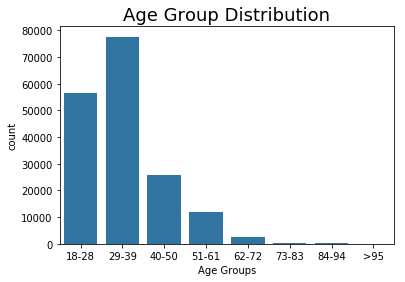

In [63]:
# Plot the age group distribution
sb.countplot(data=ford, x="age_group", color=color)
# Set axis labels
plt.title("Age Group Distribution", fontsize=18)
plt.xlabel("Age Groups")

plt.show()

The distribution shows that most bike users are between the age range of 29 and 39 years

## Drop Columns

Since we have engineered necessary features we can comfortable drop the unnecessary columns to avoid redundancy

We would particularly be dropping the duration_sec because of its high values comparison would need scale transformation and since the convertion to minute is similar to the scalar transformation we would only be using this

In [64]:
ford.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'log_duration', 'duration_min', 'duration_hrs', 'start_week_days',
       'end_week_days', 'start_hour', 'end_hour', 'distance', 'age',
       'age_group'],
      dtype='object')

In [65]:
#Subset the dataFrame to only columns relevant to the analysis
cols = [
    "duration_sec",
    "duration_hrs",
    "age",
    "member_birth_year",
    'start_time', 
    'end_time',
    "start_station_latitude", 
    "start_station_longitude", 
    "end_station_longitude", 
    "end_station_latitude", 
]

ford.drop(columns=cols,inplace=True)

In [66]:
# Test to see that the columns were successfully dropped
ford.columns

Index(['start_station_name', 'end_station_name', 'user_type', 'member_gender',
       'bike_share_for_all_trip', 'log_duration', 'duration_min',
       'start_week_days', 'end_week_days', 'start_hour', 'end_hour',
       'distance', 'age_group'],
      dtype='object')


> The Duration column actually had extreme outliers and the initial plot showed the values clustered at a particular range, so i initially limited the x axis to zoom in to the clustering, the data seemed to have 2 peaks closely tied together. Then i  transformed the axis using the lograthimic function which had the same results with the data plotted in minutes. i also confirmed the observation with a plotted duration in hours.
Finally, the data is very skewed to the right 

> i had to create new features such as age_group(from members birth years), distance(from the longitude and latitude), start and end week days (from the start and end time columns) as well as the start and end hours.
Then the original columns were dropped

## Bivariate Exploration


**1. Investigating the relationship between Trip Duration and Trip Distance**

Lets see the correlation between the numeric values

In [67]:
ford.corr()

,log_duration,duration_min,distance
log_duration,1.000000,0.494986,0.619383
duration_min,0.494986,1.000000,0.141262
distance,0.619383,0.141262,1.000000


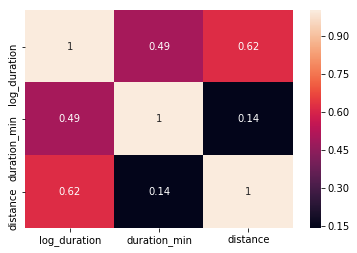

In [68]:
sb.heatmap(data=ford.corr(), annot=True );

There is a weak positive correlation between the Duration_min and Distance columns but a stronger positive correlation between the Log_duration and distance

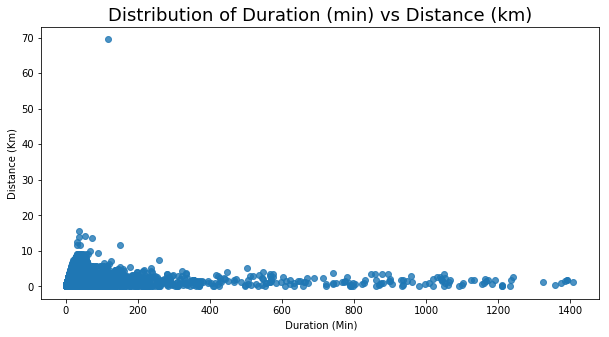

In [69]:
plt.figure(figsize=(10,5))
sb.regplot(data=ford, fit_reg=False, x="duration_min", y="distance", x_jitter=0.3)
# plt.xlim(0,80)
plt.xlabel(" Duration (Min)")
plt.ylabel("Distance (Km)")
plt.title("Distribution of Duration (min) vs Distance (km)", fontsize=18)

plt.show()

This shows that most Trips Have a distance of less than 20km and an unusual outlier of about 70km. Thus, the most pat of the duration are concentrated between 0mins and 200mins 

Lets set the x and y limit to a much smaller value

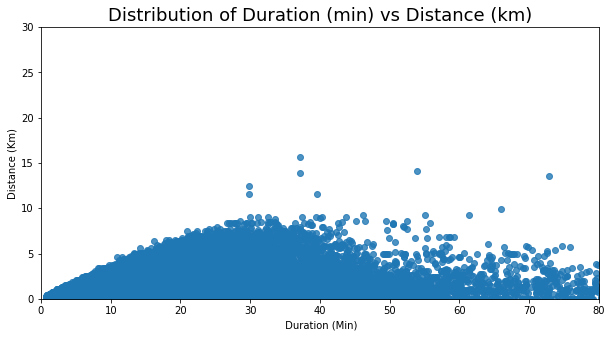

In [70]:
plt.figure(figsize=(10,5))
sb.regplot(data=ford, fit_reg=False, x="duration_min", y="distance", x_jitter=0.3)
plt.xlim(0,80)
plt.ylim(0,30)
plt.xlabel(" Duration (Min)")
plt.ylabel("Distance (Km)")
plt.title("Distribution of Duration (min) vs Distance (km)", fontsize=18)

plt.show()

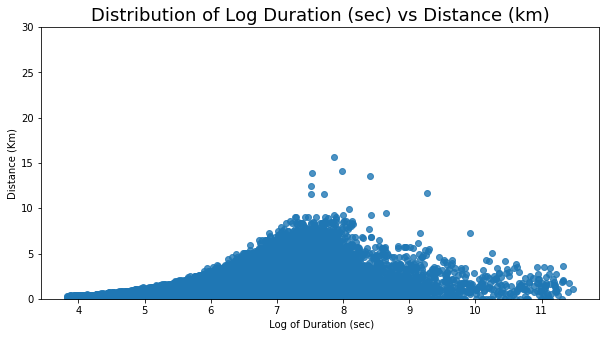

In [71]:
plt.figure(figsize=(10,5))
sb.regplot(data=ford, fit_reg=False, x="log_duration", y="distance", x_jitter=0.3)
plt.xlabel(" Log of Duration (sec)")
plt.ylabel("Distance (Km)")
plt.title("Distribution of Log Duration (sec) vs Distance (km)", fontsize=18)
plt.ylim(0,30)
plt.show()

Since the duration_min is closely related to the log_duration, we would continue this analysis with only the duration_min column

**2. Investigating the relationship between Trip Duration and User Type**

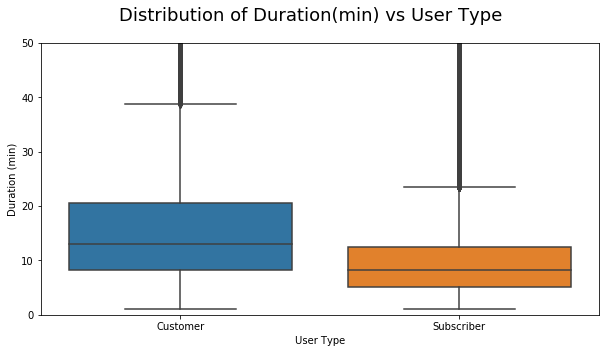

In [72]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Duration(min) vs User Type", fontsize=18)

sb.boxplot(y="duration_min", x="user_type", data=ford)
plt.xlabel("User Type")
plt.ylabel("Duration (min)")
plt.ylim(0,50)

plt.show()

The box plot shows a much larger median and value for the customers than for the suscribers.
But this is contrary to the value_counts of user type, subscribers are much more than customers.

This calls for further analysis

Due to the wide range of outliers, this might be plausible but we would have to ascertain

we also notice a slight change in the coloring

In [73]:
ford.user_type.value_counts().index

CategoricalIndex(['Subscriber', 'Customer'], categories=['Customer', 'Subscriber'], ordered=False, dtype='category')

We can see that the categories are switched compared to the categorical index. Hence we need to provide a definite placement to these categorical variables to avoid a switch in color as shown above

In [74]:
index={
    'user_type':['Subscriber', 'Customer'],
    'member_gender':['Male', 'Female', 'Other'],
    'bike_share_for_all_trip':['No', 'Yes'],
    'age_group':['18-28', '29-39', '40-50', '51-61', '62-72', '73-83', '84-94', '>95'],
    'start_week_days':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
    'end_week_days':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
    'start_hour':[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
    'end_hour':[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
}

for var in index:
    value = pd.api.types.CategoricalDtype(categories = index[var], ordered=True)
    ford[var] = ford[var].astype(value)

In [75]:
ford.user_type.value_counts().index

CategoricalIndex(['Subscriber', 'Customer'], categories=['Subscriber', 'Customer'], ordered=True, dtype='category')

We can see the categories are the same with the categorical index.

Lets plot to confirm our suspicion

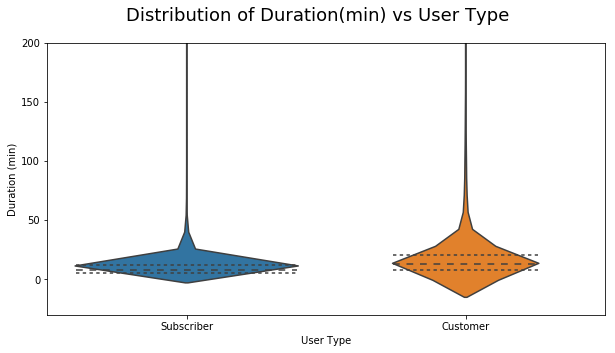

In [116]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Duration(min) vs User Type", fontsize=18)

sb.violinplot(y="duration_min", x="user_type", data=ford, inner="quartile")
plt.xlabel("User Type")
plt.ylabel("Duration (min)")
plt.ylim(-30,200)

plt.show()

As we can see, Nothing changed, so the data is correct as is. However the violin plot shows a negative value for the customers

Unlike the boxplot which has a minimum value of 0

**3. Investigating the relationship between Trip Duration and Member Gender**

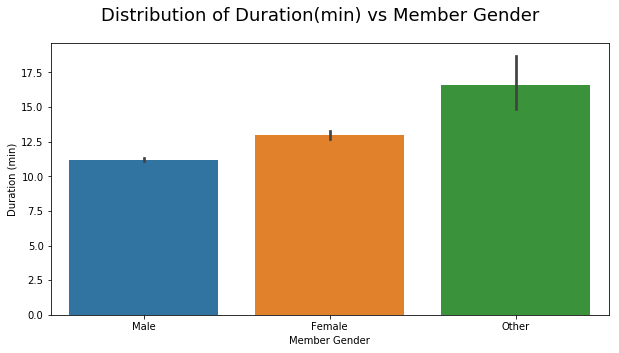

In [77]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Duration(min) vs Member Gender", fontsize=18)

sb.barplot(data=ford, x="member_gender",y="duration_min")
plt.xlabel("Member Gender")
plt.ylabel("Duration (min)")

plt.show()

This reveals that the other gender spends more time on trips than any other gender even though the "other gender is the least in number

lets verify this with a violin plot

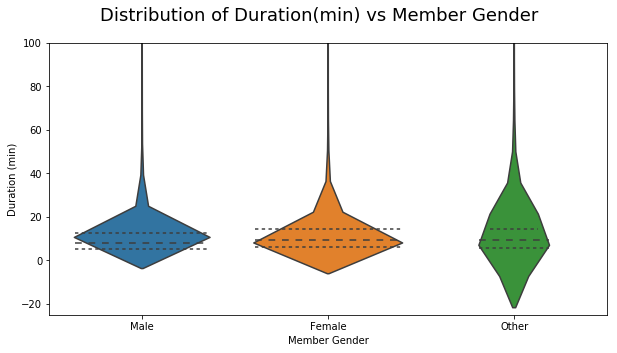

In [78]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Duration(min) vs Member Gender", fontsize=18)

sb.violinplot(x="member_gender", y="duration_min", data=ford, inner="quartile")
plt.xlabel("Member Gender")
plt.ylabel("Duration (min)")
plt.ylim(-25,100)

plt.show()

This reveals that the other male and female gender have a uniform distribution intrip duration below 20mins. hence they are wider than the other gender column because they have more data then the other gender 

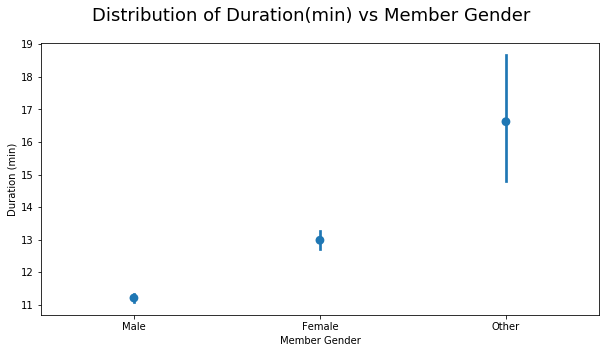

In [79]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Duration(min) vs Member Gender", fontsize=18)

sb.pointplot(x="member_gender", y="duration_min", data=ford, linestyles="")
plt.xlabel("Member Gender")
plt.ylabel("Duration (min)")
plt.show()

This shows that the other gender spend the highest journey time

**4. Investigating the relationship between Trip Duration and Age Group**

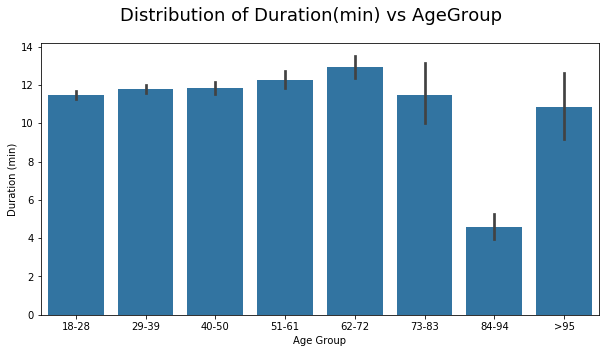

In [80]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Duration(min) vs AgeGroup", fontsize=18)

sb.barplot(x="age_group", y="duration_min", data=ford, color=color)
plt.xlabel("Age Group")
plt.ylabel("Duration (min)")

plt.show()

This barplot shows that the age group between 62 and 72 years spend more trip time than anyother age group

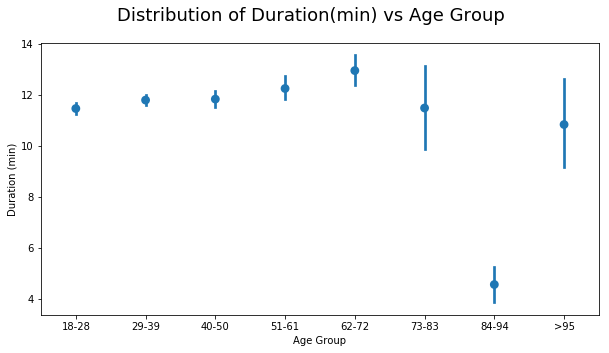

In [81]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Duration(min) vs Age Group", fontsize=18)

sb.pointplot(x="age_group", y="duration_min", data=ford, linestyles="")
plt.xlabel("Age Group")
plt.ylabel("Duration (min)")

plt.show()

The point plot suggests the same as they spend atleast 12mins journeying

**5. Investigating the relationship between Trip Duration and Start_week and end week days**

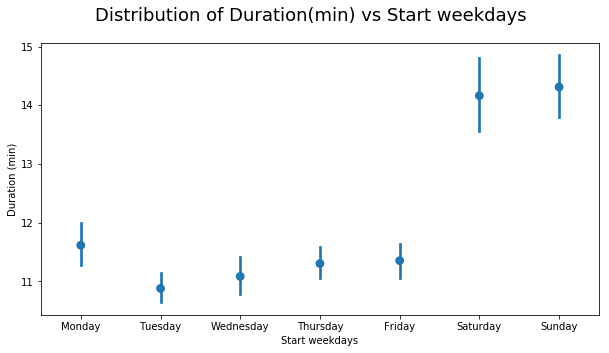

In [82]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Duration(min) vs Start weekdays", fontsize=18)

sb.pointplot(x="start_week_days", y="duration_min", data=ford, linestyles="")
plt.xlabel("Start weekdays")
plt.ylabel("Duration (min)")
plt.show()

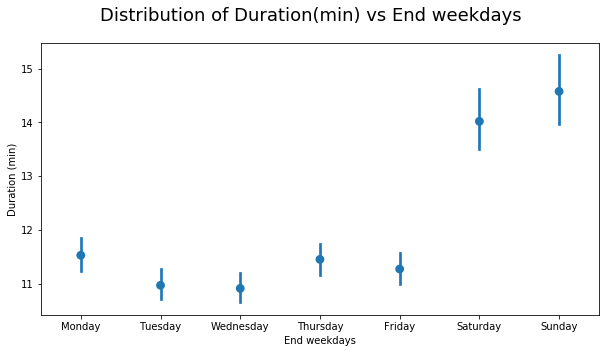

In [83]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Duration(min) vs End weekdays", fontsize=18)

sb.pointplot(x="end_week_days", y="duration_min", data=ford, linestyles="")
plt.xlabel("End weekdays")
plt.ylabel("Duration (min)")
plt.show()

This pointplot shows that the highest time is spent jorneying on sundays and saturdays than anyother day

**6. Investigating the relationship between Trip Duration and Start and end hours**

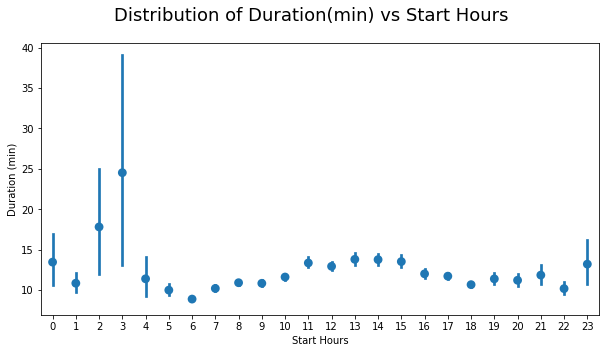

In [84]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Duration(min) vs Start Hours", fontsize=18)

sb.pointplot(x="start_hour", y="duration_min", data=ford, linestyles="")
plt.xlabel("Start Hours")
plt.ylabel("Duration (min)")
plt.show()

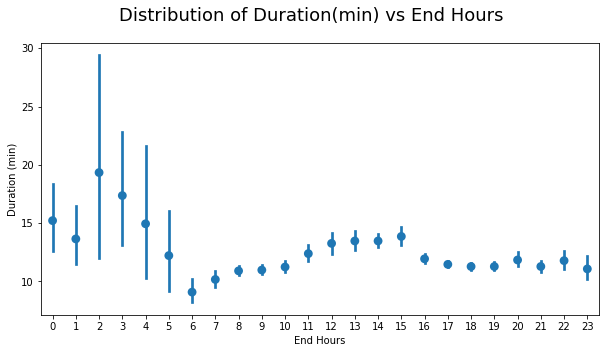

In [85]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Duration(min) vs End Hours", fontsize=18)

sb.pointplot(x="end_hour", y="duration_min", data=ford, linestyles="")
plt.xlabel("End Hours")
plt.ylabel("Duration (min)")
plt.show()

This shows that whle most trips that start by 3am tend to be longer, those that end by 2am tend to be longer too

**7. Investigating the relationship between Trip Duration and All Trips**

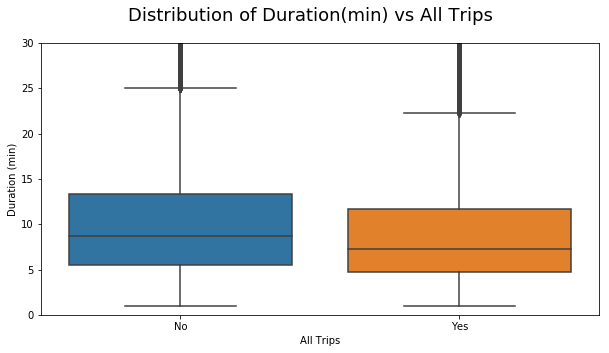

In [86]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Duration(min) vs All Trips", fontsize=18)

sb.boxplot(x="bike_share_for_all_trip", y="duration_min", data=ford)
plt.xlabel("All Trips")
plt.ylabel("Duration (min)")
plt.ylim(0,30)
plt.show()

This shows that more trip time is spent by thos that dont use bikes for all trips

**8. Investigating the relationship between Trip Distance and User Type**

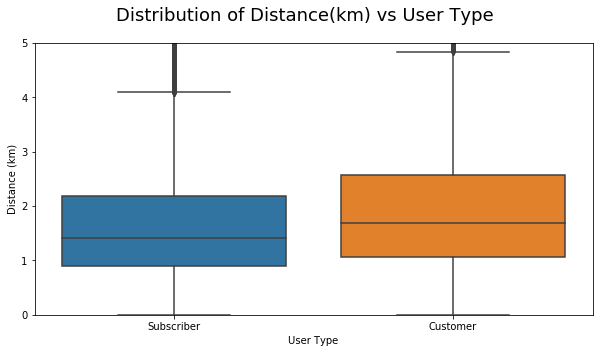

In [87]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Distance(km) vs User Type", fontsize=18)

sb.boxplot(x="user_type", y="distance", data=ford)
plt.xlabel("User Type")
plt.ylabel("Distance (km)")
plt.ylim(0,5)

plt.show()

This shows that customers cover longer distances than subscribers

**9. Investigating the relationship between Trip Distance and Gender**

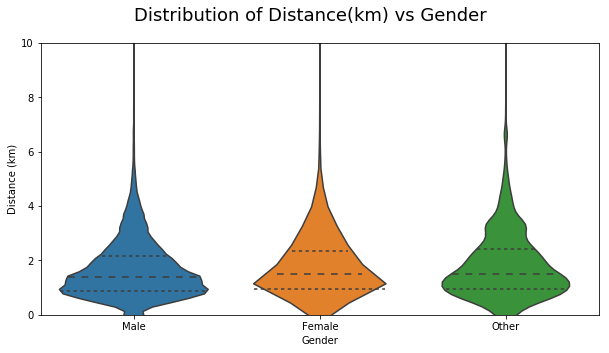

In [88]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Distance(km) vs Gender", fontsize=18)

sb.violinplot(x="member_gender", y="distance", data=ford, inner="quartile")
plt.xlabel("Gender")
plt.ylabel("Distance (km)")
plt.ylim(0,10)

plt.show()

This shows that the distance covered by each gender is very similar all generally between 0 and 2km

**10. Investigating the relationship between Trip Distance and All Round Trips**

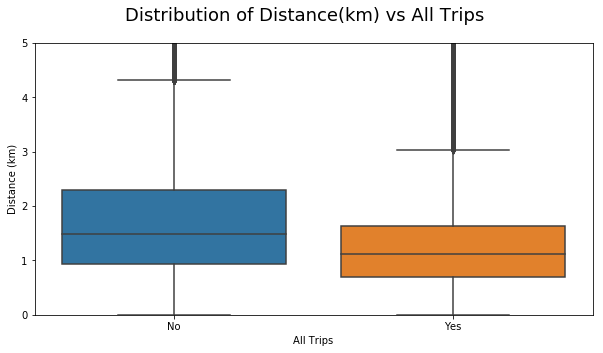

In [89]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Distance(km) vs All Trips", fontsize=18)

sb.boxplot(x="bike_share_for_all_trip", y="distance", data=ford)
plt.xlabel("All Trips")
plt.ylabel("Distance (km)")
plt.ylim(0,5)

plt.show()

This shows that longer distance is covered by those who dont use bikes for all round trips

**11. Investigating the relationship between Trip Distance and Start/End Hours**

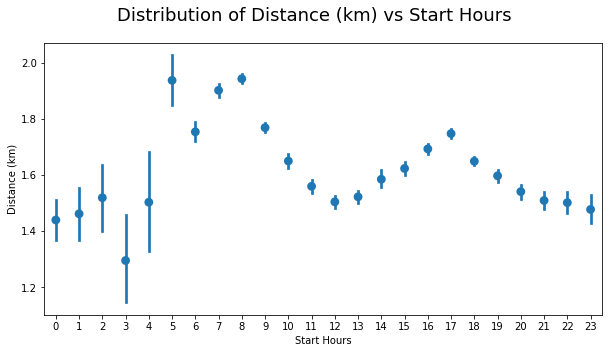

In [90]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Distance (km) vs Start Hours", fontsize=18)

sb.pointplot(x="start_hour", y="distance", data=ford, linestyles="")
plt.xlabel("Start Hours")
plt.ylabel("Distance (km)")
plt.show()

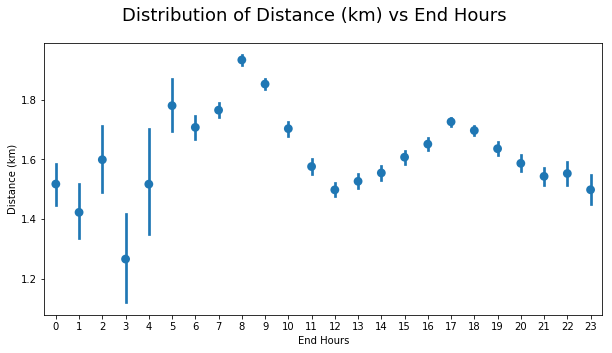

In [91]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Distance (km) vs End Hours", fontsize=18)

sb.pointplot(x="end_hour", y="distance", data=ford, linestyles="")
plt.xlabel("End Hours")
plt.ylabel("Distance (km)")
plt.show()

Trips that start by 5am and 8am and thos that end by 8am tend to long distance travels

**12. Investigating the relationship between Trip Distance and Week Days**

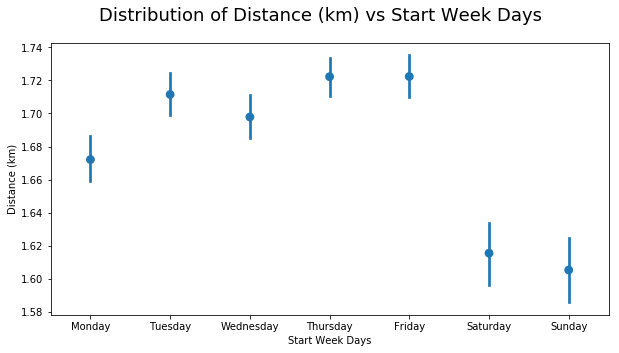

In [92]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Distance (km) vs Start Week Days", fontsize=18)

sb.pointplot(x="start_week_days", y="distance", data=ford, linestyles="")
plt.xlabel("Start Week Days")
plt.ylabel("Distance (km)")
plt.show()

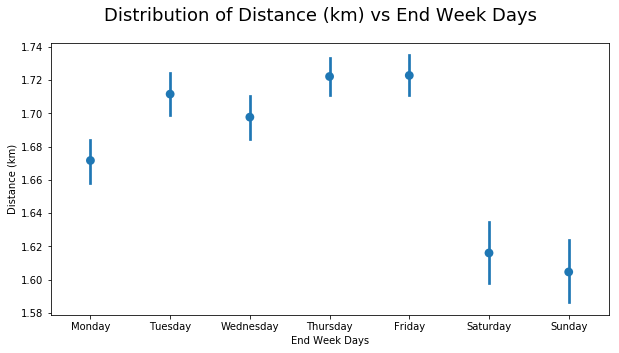

In [93]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Distance (km) vs End Week Days", fontsize=18)

sb.pointplot(x="end_week_days", y="distance", data=ford, linestyles="")
plt.xlabel("End Week Days")
plt.ylabel("Distance (km)")
plt.show()

Trips that start and end on Tuesdays, Thursdays and Fridays Tend to cover more km in travel

**13. Investigating the relationship between Trip Distance and Age Groups**

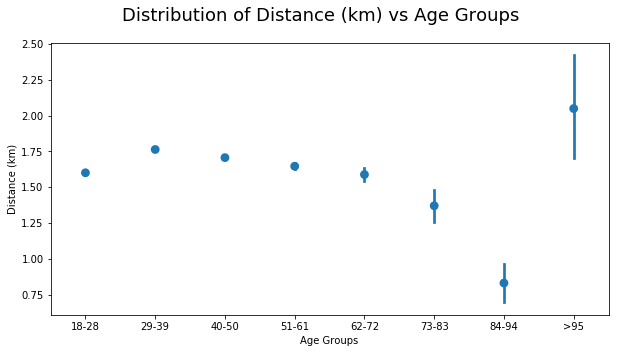

In [94]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Distance (km) vs Age Groups", fontsize=18)

sb.pointplot(x="age_group", y="distance", data=ford, linestyles="")
plt.xlabel("Age Groups")
plt.ylabel("Distance (km)")
plt.show()

Travellers with the most distance covered are above 95years old

**14. Investigating the relationship between Gender and User Type**

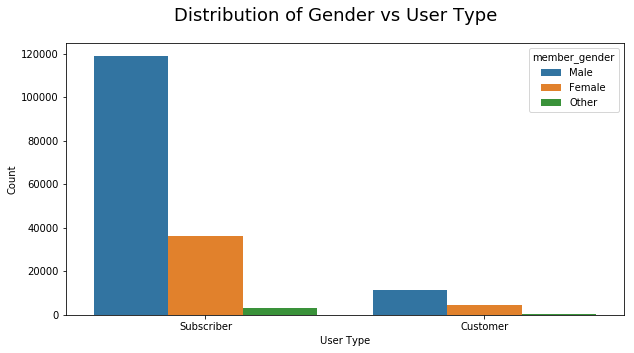

In [95]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Gender vs User Type", fontsize=18)

sb.countplot(x="user_type", hue="member_gender", data=ford)
plt.xlabel("User Type")
plt.ylabel("Count")

plt.show()

**15. Investigating the relationship between Gender and Start/End Hours**

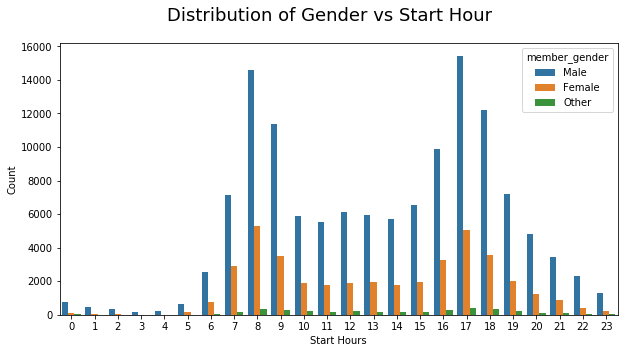

In [96]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Gender vs Start Hour", fontsize=18)

sb.countplot(x="start_hour", hue="member_gender", data=ford)
plt.xlabel("Start Hours")
plt.ylabel("Count")

plt.show()

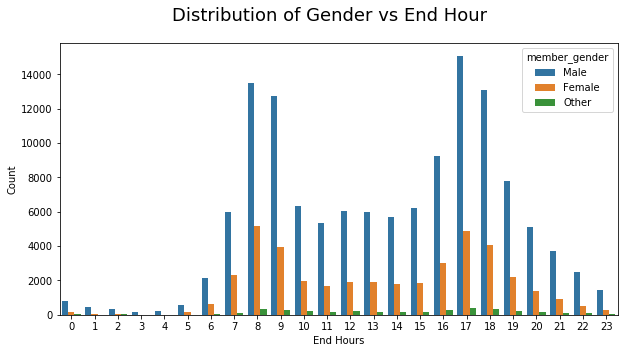

In [97]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Gender vs End Hour", fontsize=18)

sb.countplot(x="end_hour", hue="member_gender", data=ford)
plt.xlabel("End Hours")
plt.ylabel("Count")

plt.show()

Males generally start and end their trips more than any other gender at all hours of the day with the most frequency by 8am and 5pm

**16. Investigating the relationship between Gender and Start/End Week Days**

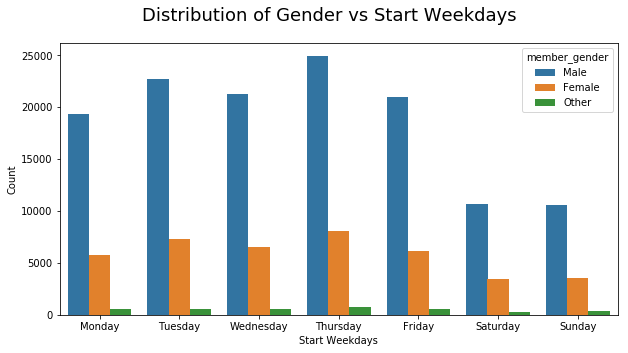

In [98]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Gender vs Start Weekdays", fontsize=18)

sb.countplot(x="start_week_days", hue="member_gender", data=ford)
plt.xlabel("Start Weekdays")
plt.ylabel("Count")

plt.show()

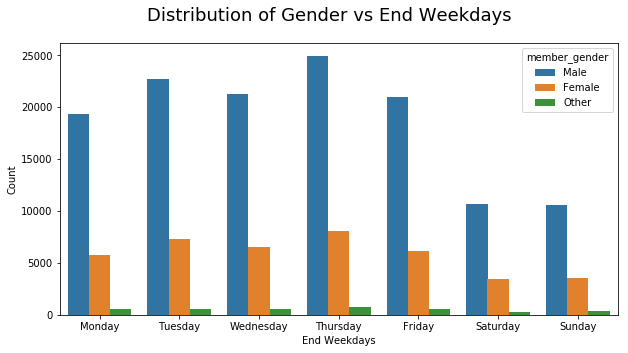

In [99]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Gender vs End Weekdays", fontsize=18)

sb.countplot(x="end_week_days", hue="member_gender", data=ford)
plt.xlabel("End Weekdays")
plt.ylabel("Count")

plt.show()

Males generally start and end their trips more than any other gender for all days of the week with the most frequency by Thursday and Tuesdays

**17. Investigating the relationship between Gender and Age Groups**

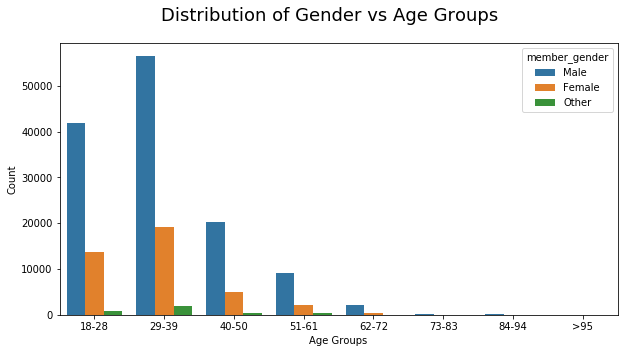

In [100]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Gender vs Age Groups", fontsize=18)

sb.countplot(x="age_group", hue="member_gender", data=ford)
plt.xlabel("Age Groups")
plt.ylabel("Count")

plt.show()

Males travel most across all age groups

**18. Investigating the relationship between Age Groups and Start/End Week Days**

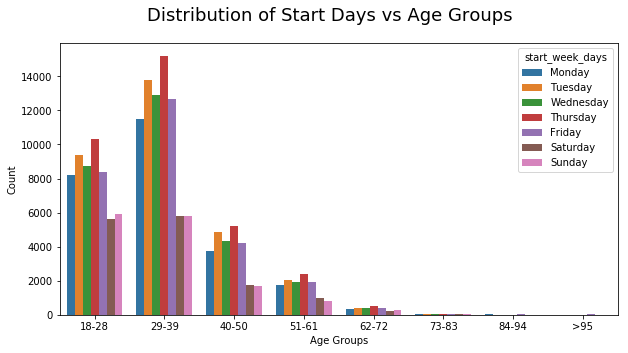

In [101]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Start Days vs Age Groups", fontsize=18)

sb.countplot(hue="start_week_days", x="age_group", data=ford)
plt.xlabel("Age Groups")
plt.ylabel("Count")

plt.show()

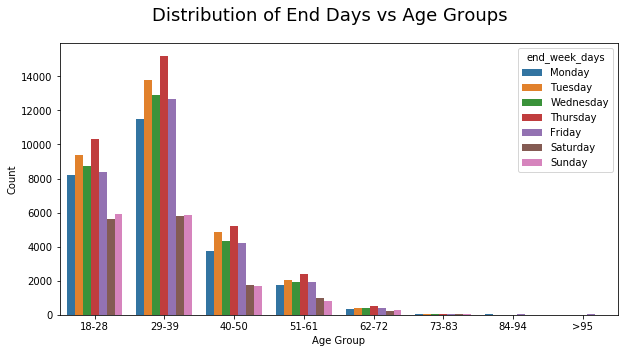

In [102]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of End Days vs Age Groups", fontsize=18)

sb.countplot(hue="end_week_days", x="age_group", data=ford)
plt.xlabel("Age Group")
plt.ylabel("Count")

plt.show()

The young adults travel the most, with Thursdays being the most frequent start and end trip days

**19. Investigating the relationship between Age Groups and Start/End Hours**

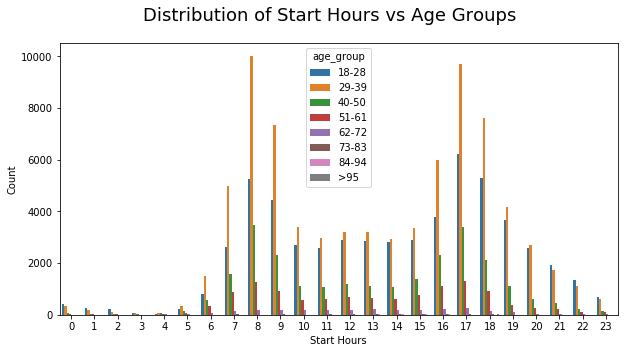

In [103]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Start Hours vs Age Groups", fontsize=18)

sb.countplot(x="start_hour", hue="age_group", data=ford)
plt.xlabel("Start Hours")
plt.ylabel("Count")

plt.show()

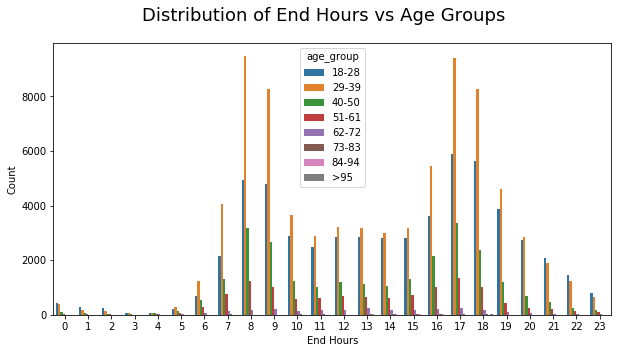

In [104]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of End Hours vs Age Groups", fontsize=18)

sb.countplot(x="end_hour", hue="age_group", data=ford)
plt.xlabel("End Hours")
plt.ylabel("Count")

plt.show()

8am-9am, 5pm-6pm has the most travel with age groups 29-39, accross all hours, except from 9pm-3am which is dominated by age groups 18-28

**20. Investigating the relationship between Age Groups and All Trips**

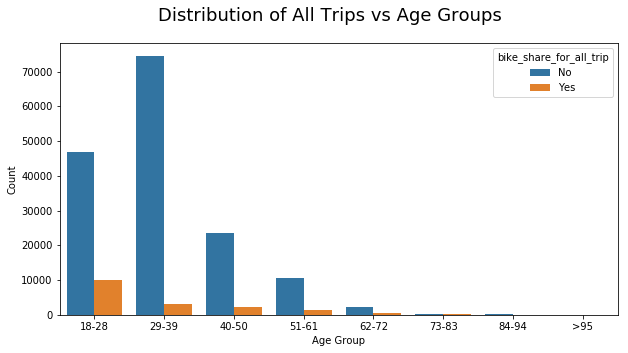

In [105]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of All Trips vs Age Groups", fontsize=18)

sb.countplot(hue="bike_share_for_all_trip", x="age_group", data=ford)
plt.xlabel("Age Group")
plt.ylabel("Count")

plt.show()

Across all age groups the most users dont use bikes for all round trips

**21. Investigating the relationship between Gender and All Trips**

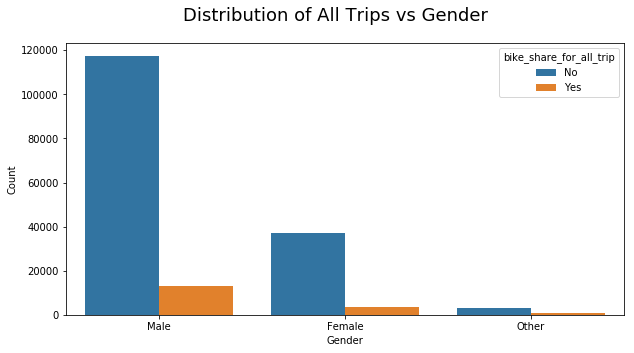

In [106]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of All Trips vs Gender", fontsize=18)

sb.countplot(hue="bike_share_for_all_trip", x="member_gender", data=ford)
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

The larger percentage of users that dont use bike for all round trips are males, owing to the fact that males take up the most part of the dataset

**22. Investigating the relationship between User Type and All Trips**

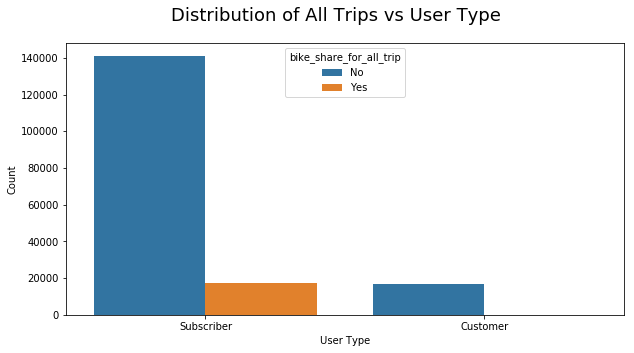

In [107]:
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of All Trips vs User Type", fontsize=18)

sb.countplot(hue="bike_share_for_all_trip", x="user_type", data=ford)
plt.xlabel("User Type")
plt.ylabel("Count")

plt.show()

The same applies to user type, No customer uses bikes for all round trips


> Due to the wide range of outliers, comparing distance and duration with the other variables was strangely depicted, However the data reflected that the longer Trip Duration was done by the lesser reresented data values, the violin plot also had some negatives.

> I noticed that most trips distance was less than 2-5km, and the younger age groups also made more trips over short distances and time but the older age groups made less trips over longer distances and time 

## Multivariate Exploration



**1. Plotting Trip Duration, User Type and Gender**

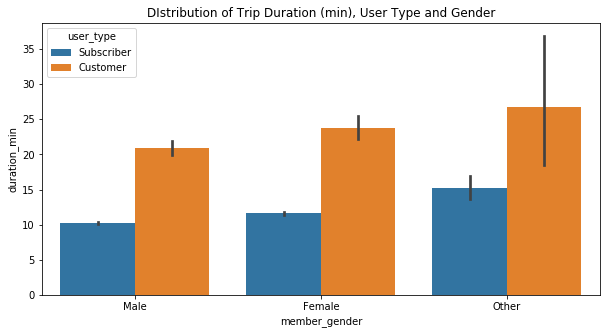

In [108]:
plt.figure(figsize=[10,5])
sb.barplot(data=ford, y="duration_min",hue="user_type",x="member_gender")
plt.title("DIstribution of Trip Duration (min), User Type and Gender")
plt.show()

Customers tend to spend more time in transit, particularly the other gender

**2. Plotting Trip Duration, Age Group and Weekdays**

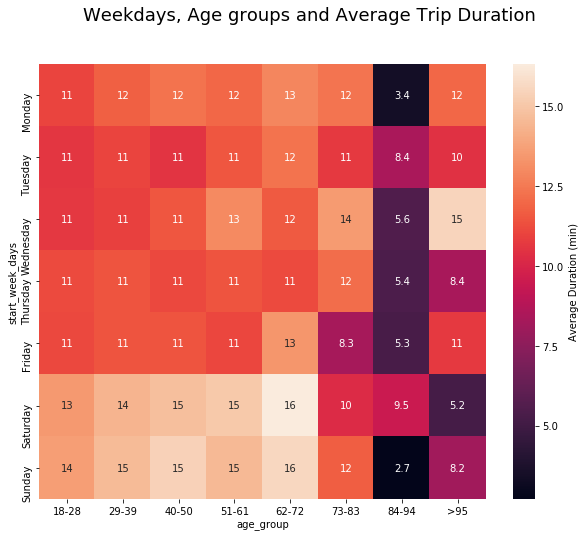

In [109]:
cate = ford.groupby(["age_group","start_week_days"]).mean()["duration_min"].reset_index(name="avg_duration")
cate = cate.pivot_table(index="start_week_days", columns="age_group", values="avg_duration")

plt.figure(figsize=[10,8])
plt.suptitle("Weekdays, Age groups and Average Trip Duration", fontsize=18)
sb.heatmap(cate, annot=True,cbar_kws = {'label' : 'Average Duration (min)'})

plt.show()

Weekends have the Longer average duration in minutes. That is, longer trips are made during weekends

**3. Plotting Trip Distance, Age Group and Start Week Days**

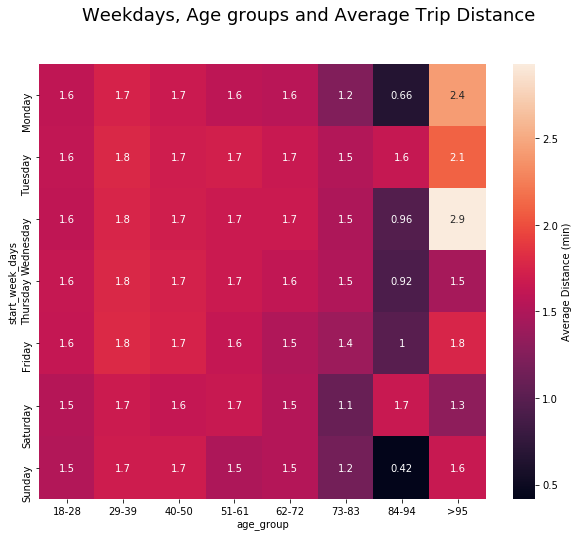

In [110]:
cate = ford.groupby(["age_group","start_week_days"]).mean()["distance"].reset_index(name="avg_distance")
cate = cate.pivot_table(index="start_week_days", columns="age_group", values="avg_distance")

plt.figure(figsize=[10,8])
plt.suptitle("Weekdays, Age groups and Average Trip Distance", fontsize=18)
sb.heatmap(cate, annot=True,cbar_kws = {'label' : 'Average Distance (min)'})

plt.show()

More Distance is covered during week days than weekends


**4. Plotting Trip Duration, Gender and Start Hour**

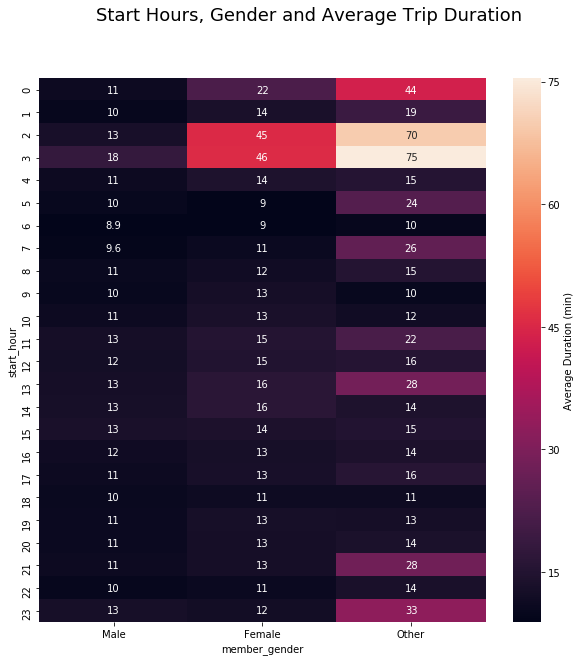

In [111]:
cate = ford.groupby(["member_gender","start_hour"]).mean()["duration_min"].reset_index(name="avg_duration")
cate = cate.pivot_table(index="start_hour", columns="member_gender", values="avg_duration")

plt.figure(figsize=[10,10])
plt.suptitle("Start Hours, Gender and Average Trip Duration", fontsize=18)
sb.heatmap(cate, annot=True,cbar_kws = {'label' : 'Average Duration (min)'})

plt.show()

This shows that females generally travel more around 12am-3am

**5. Plotting Trip Distance, Gender and Start Weekdays**

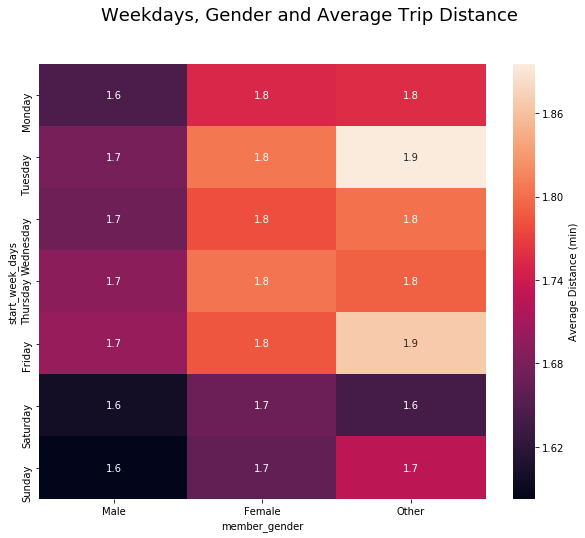

In [112]:
cate = ford.groupby(["member_gender","start_week_days"]).mean()["distance"].reset_index(name="avg_distance")
cate = cate.pivot_table(index="start_week_days", columns="member_gender", values="avg_distance")

plt.figure(figsize=[10,8])
plt.suptitle("Weekdays, Gender and Average Trip Distance", fontsize=18)
sb.heatmap(cate, annot=True,cbar_kws = {'label' : 'Average Distance (min)'})

plt.show()

The other gender cover longer distances

**6. Plotting Trip Duration, Gender and Age Groups**

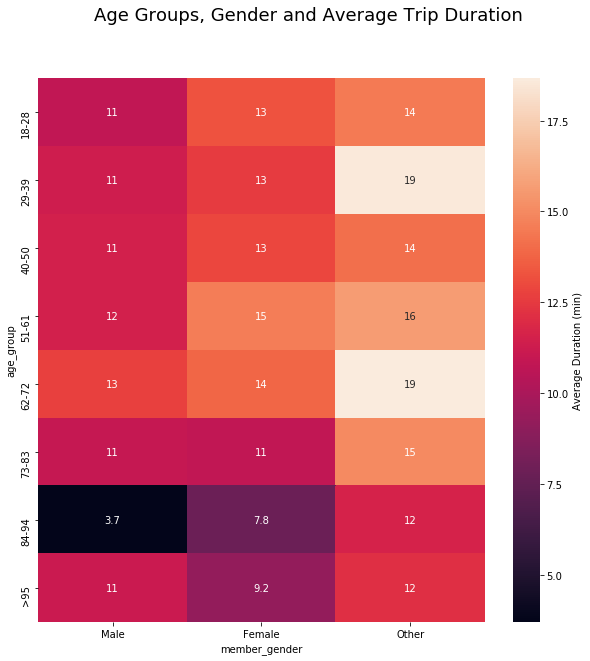

In [113]:
cate = ford.groupby(["member_gender","age_group"]).mean()["duration_min"].reset_index(name="avg_duration")
cate = cate.pivot_table(index="age_group", columns="member_gender", values="avg_duration")

plt.figure(figsize=[10,10])
plt.suptitle("Age Groups, Gender and Average Trip Duration", fontsize=18)
sb.heatmap(cate, annot=True,cbar_kws = {'label' : 'Average Duration (min)'})

plt.show()

The other gender spent the longest time on trips than anyother gender 

**7. Plotting Trip Count, Gender, User Type and Start Weekdays**

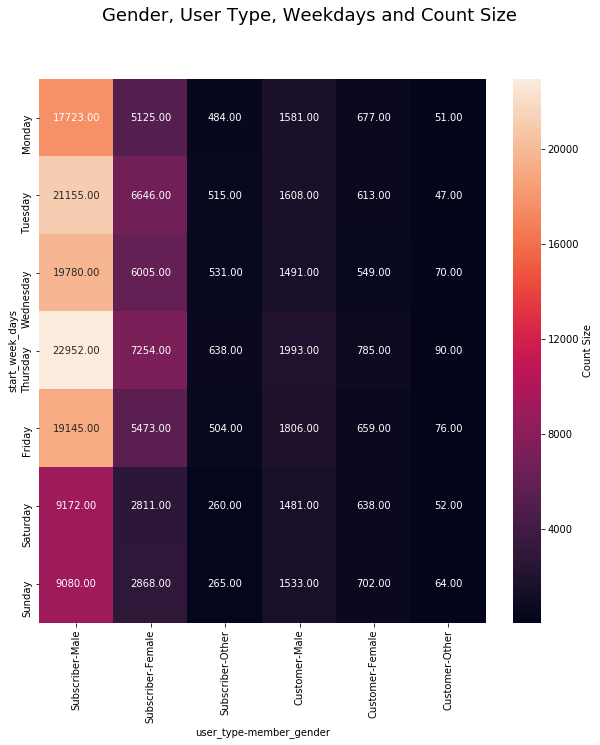

In [114]:
cate = ford.groupby(["start_week_days","member_gender","user_type"]).size().reset_index(name="count_size")
cate = cate.pivot_table(index="start_week_days", columns=["user_type","member_gender"], values="count_size")

plt.figure(figsize=[10,10])
plt.suptitle("Gender, User Type, Weekdays and Count Size", fontsize=18)
sb.heatmap(cate, annot=True,fmt=".02f",cbar_kws = {'label' : 'Count Size'})

plt.show()

Males have the greater count in the data frame and are more active during weekdays than weekends

Most males represented are subscribers

**8. Plotting Trip Count, All Trips, User Type and Start Weekdays**

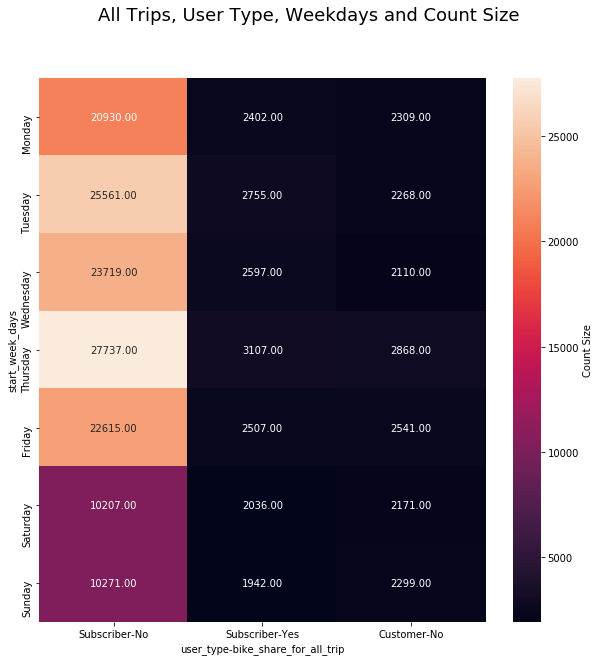

In [115]:
cate = ford.groupby(["start_week_days","bike_share_for_all_trip","user_type"]).size().reset_index(name="count_size")
cate = cate.pivot_table(index="start_week_days", columns=["user_type","bike_share_for_all_trip"], values="count_size")

plt.figure(figsize=[10,10])
plt.suptitle("All Trips, User Type, Weekdays and Count Size", fontsize=18)
sb.heatmap(cate, annot=True,fmt=".02f",cbar_kws = {'label' : 'Count Size'})

plt.show()

NO customer uses bikes for all round trips, there isnt even a column for it


> More Distance is covered during week days than weekends but Weekends have the Longer average duration in minutes. That is, longer trips are made during weekends

> No customer uses bike for all round trips, Female users are more active at midnight than any other gender

## Conclusions
>The dataset has a wide range of outliers especially the column of interest, this led to log transfromtion of the axis and it gave a similar reading when the duration is converted to minutes from seconds, this made analysis more relational in both the univariate, bivariate and multivariate analysis.
From the dataset it can be observed that differebt age groups use bikes differently, the youngest are more active at midnight and the young adults are more active during work hours.
I also discovered that though the male gender are the most represented in the data set, they cover relatively smaller distances than other genders and spend relatively shorter time in transit.

Resources
---

>-- [ford go bike exploration on medium](https://medium.datadriveninvestor.com/ford-gobike-system-data-exploration-fb5b229d4106)

>-- [complete analysis for fgb](https://www.kaggle.com/code/chirag02/ford-gobike-data-analysis)

>-- [Age categorization](https://stackoverflow.com/questions/62446911/categorize-age-into-another-column-age-group)

>-- [Age categorization](https://stackoverflow.com/questions/59081908/age-group-categorization)

>--[]()

>--[]()

>--[]()

>--[]()

>--[]()